In [2]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\atuli\OneDrive\Desktop\darkine_new\api


In [3]:
%pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

Using Roboflow to obtain data that they have made Open Source

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 229MB/s]
New https://pypi.org/project/ultralytics/8.1.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/GUI-DETECTION-3/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_b

In [8]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1705575435.1cc40f5fba28.1600.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch405.jpg	weights
P_curve.png					    train_batch406.jpg
PR_curve.png					    train_batch407.jpg


/content


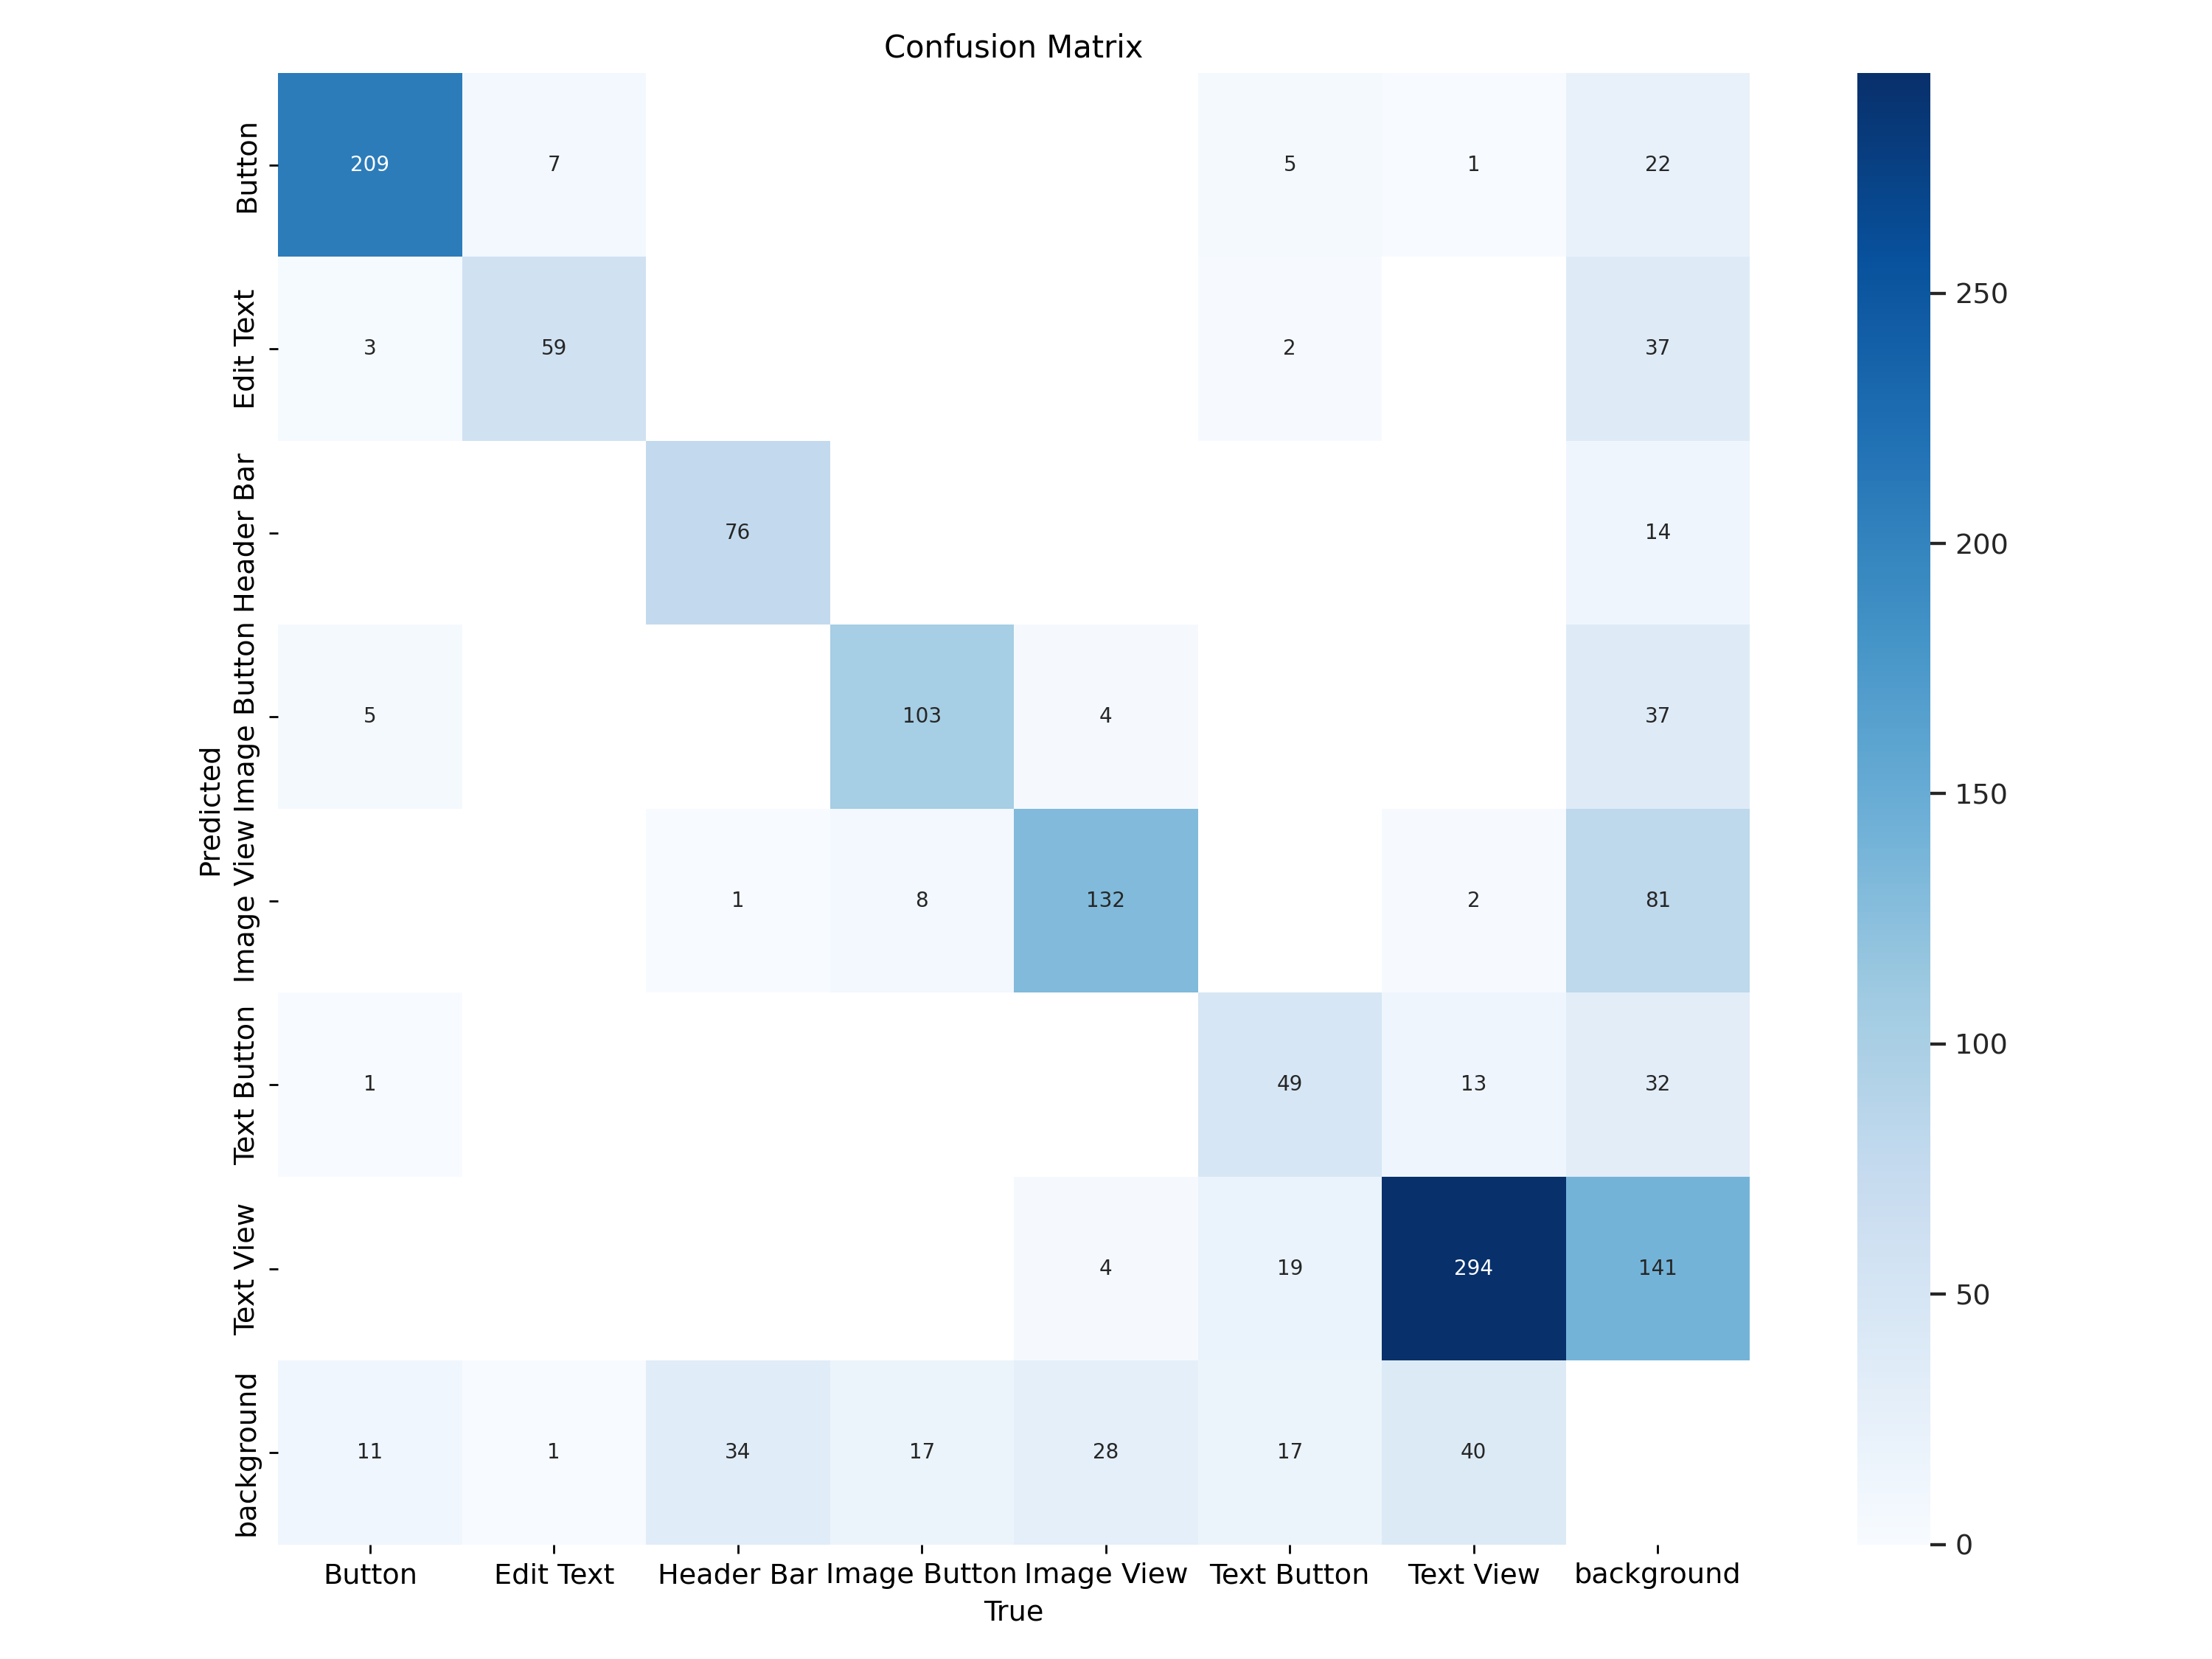

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


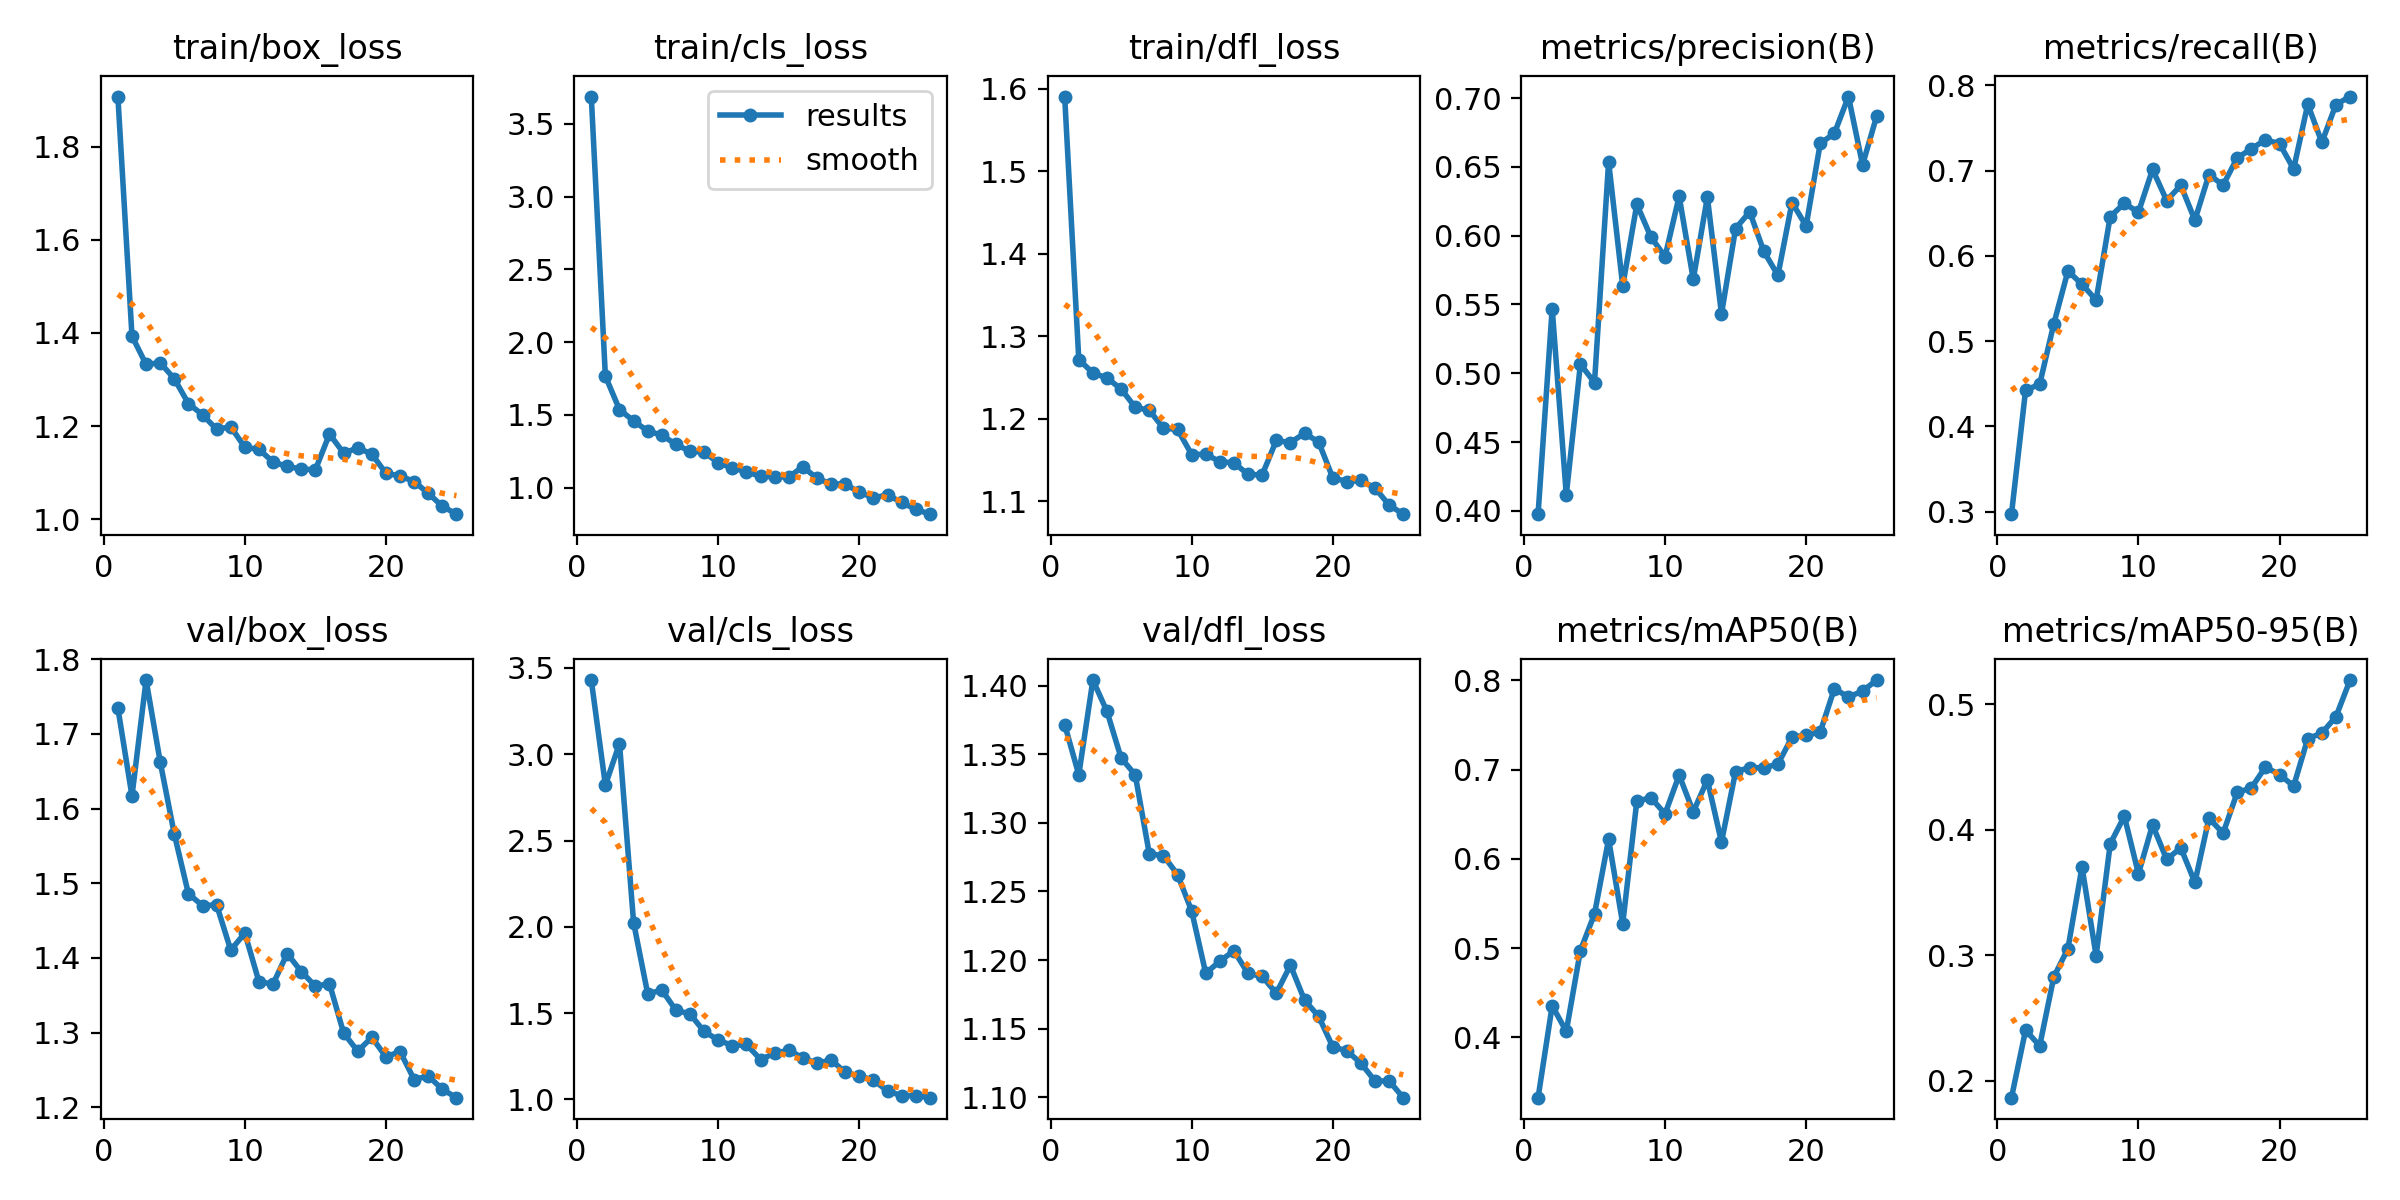

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


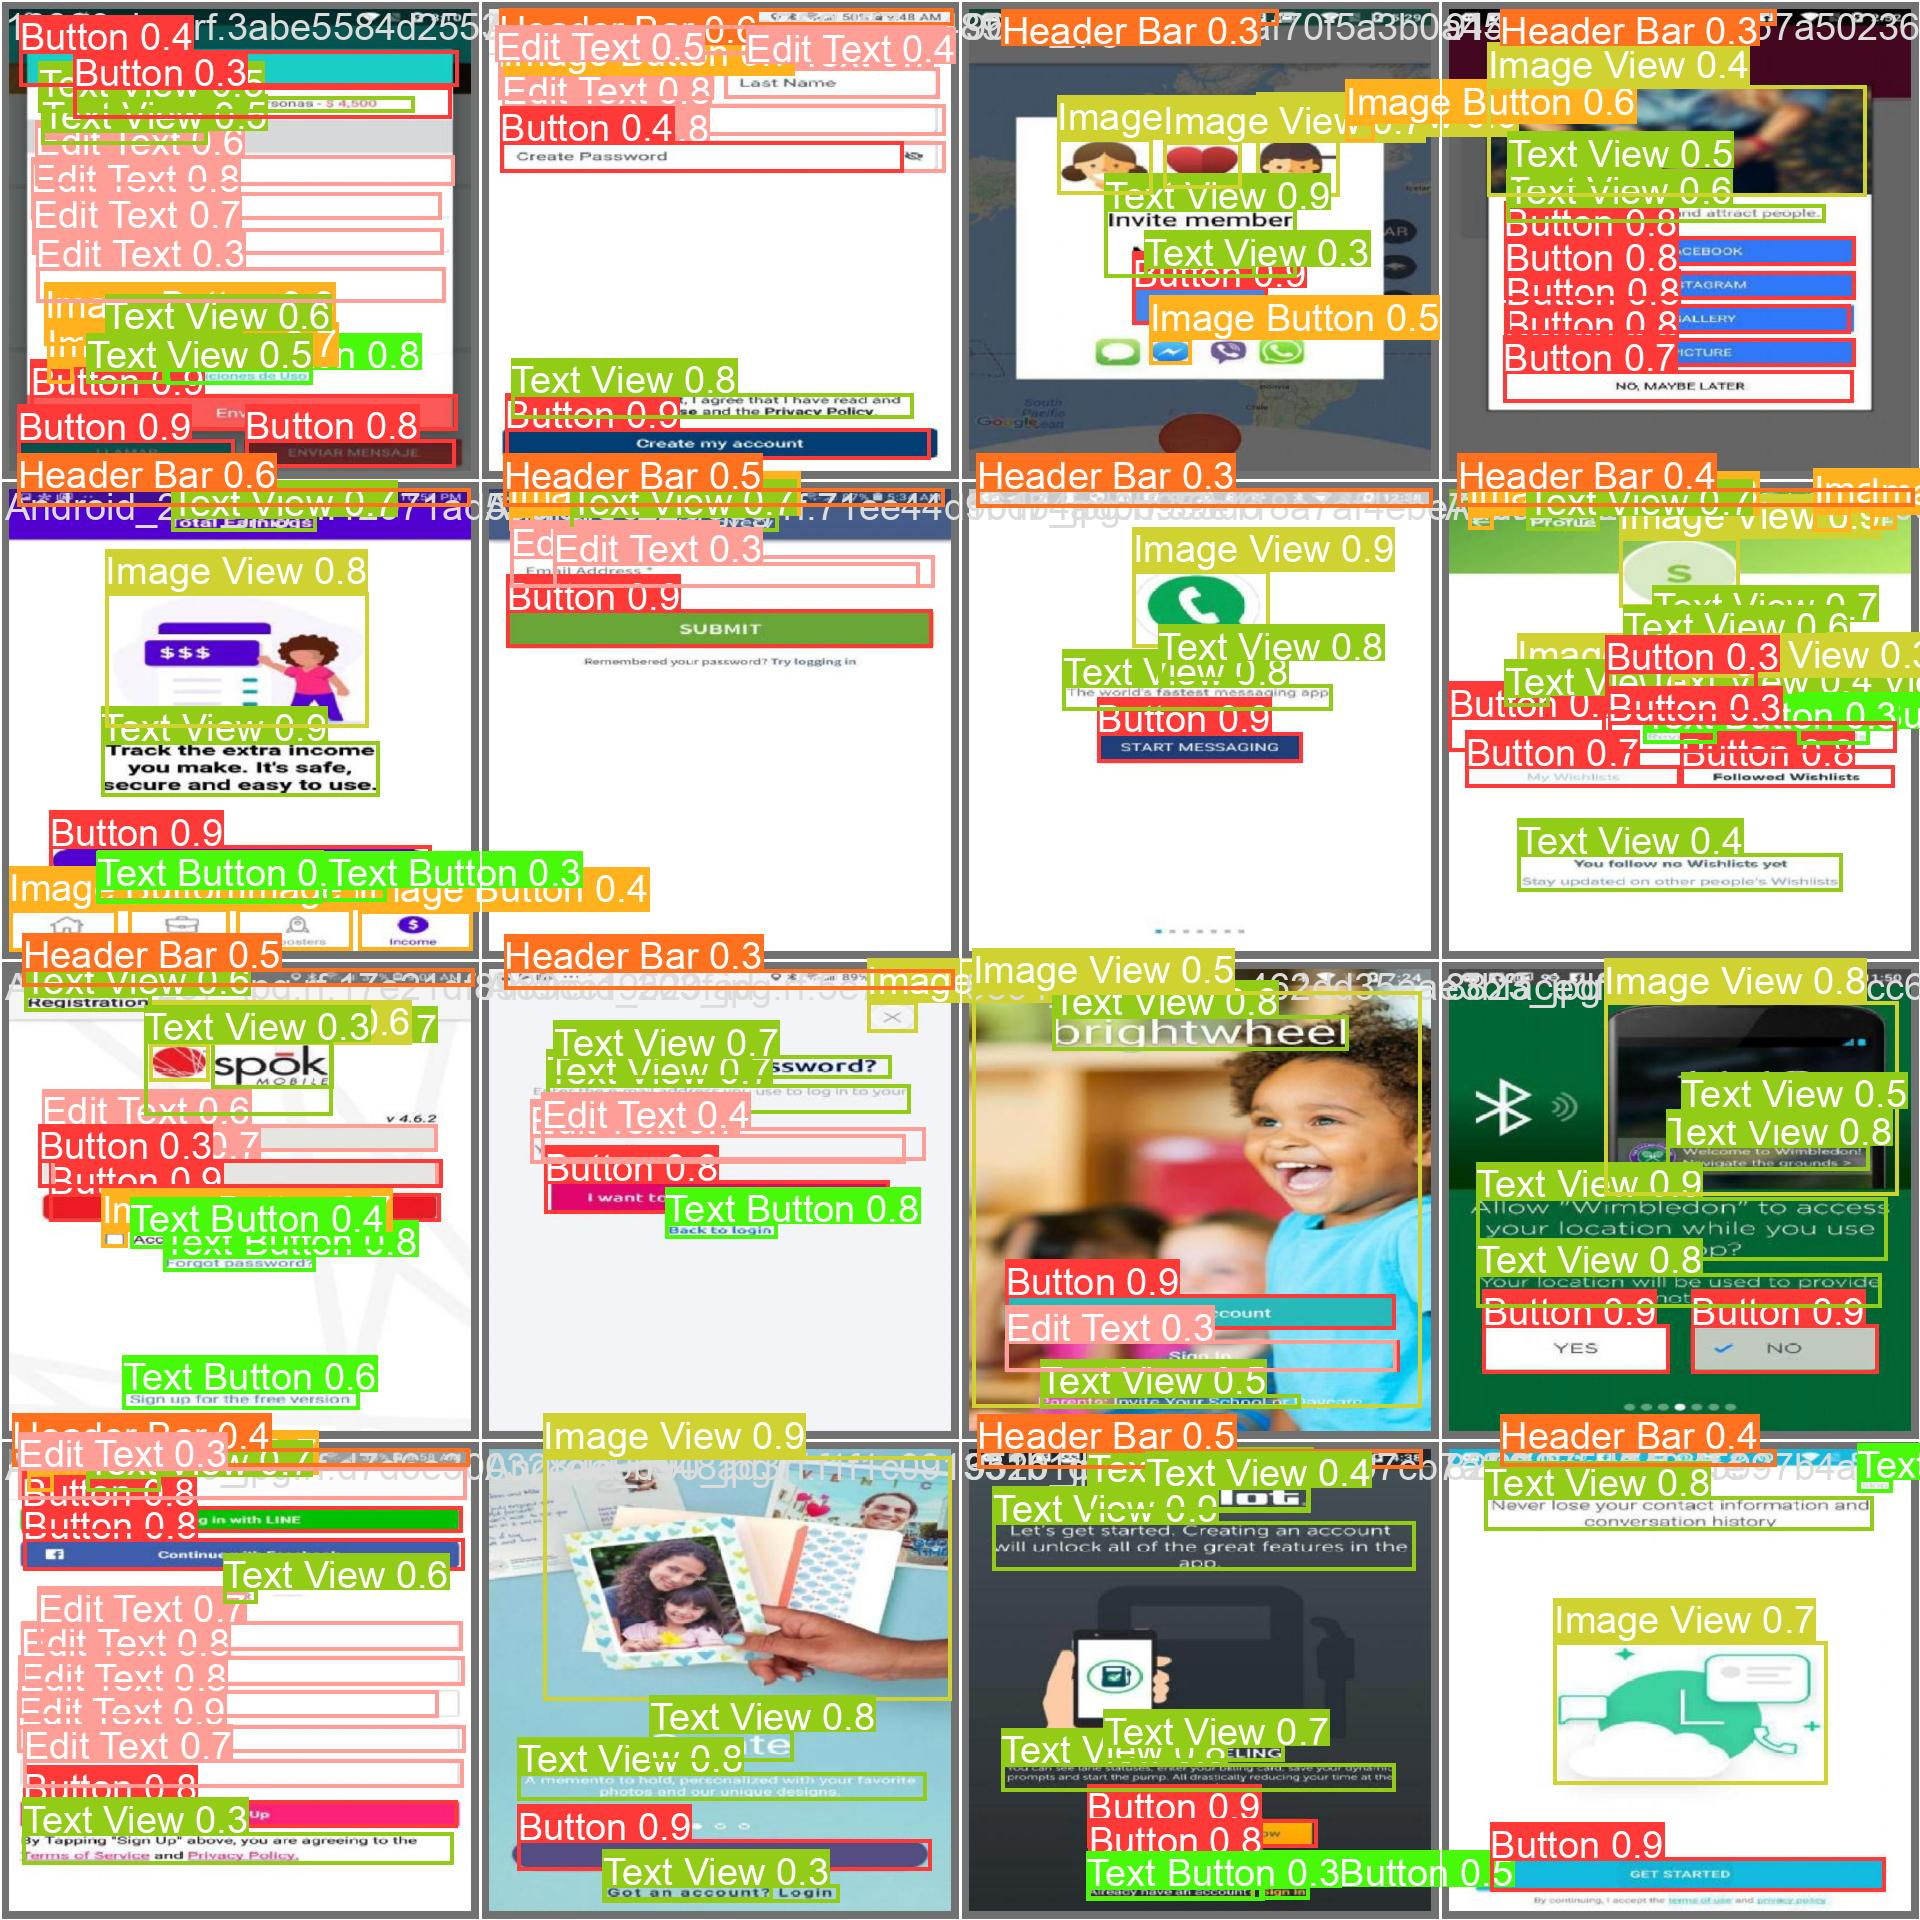

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [12]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/GUI-DETECTION-3/valid/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100% 120/120 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:11<00:00,  1.46s/it]
                   all        120       1145      0.687      0.787      0.801      0.519
                Button        120        229      0.856      0.917      0.949      0.794
             Edit Text        120         67      0.612      0.925      0.932       0.61
            Header Bar        120        111       0.85      0.667      0.883      0.529
          Image Button        120        128      0.683      0.789      0.804      0.385
            Image View        120        168       0.59      0.786      0.731      0.529
           Text Button    

In [13]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs

image 1/60 /content/datasets/GUI-DETECTION-3/test/images/10922_jpg.rf.42d3cec61bee159133991fe6f040e69a.jpg: 800x800 1 Button, 1 Header Bar, 1 Image View, 1 Text Button, 5 Text Views, 22.5ms
image 2/60 /content/datasets/GUI-DETECTION-3/test/images/11082_jpg.rf.ba9713de3f663dc84ac3e699ee198bc9.jpg: 800x800 2 Buttons, 1 Header Bar, 2 Image Views, 2 Text Buttons, 2 Text Views, 22.6ms
image 3/60 /content/datasets/GUI-DETECTION-3/test/images/11429_jpg.rf.9e0bc2634803e2fe1d5b31822f3006fa.jpg: 800x800 1 Button, 1 Header Bar, 1 Image View, 1 Text Button, 3 Text Views, 22.5ms
image 4/60 /content/datasets/GUI-DETECTION-3/test/images/1202_jpg.rf.7b9c2124582c99364361da32bc2d9b84.jpg: 800x800 2 Buttons, 3 Edit Texts, 1 Header Bar, 3 Image Buttons, 1 Text Button, 7 Text Views, 22.5ms
image 5/60 /content/datasets/GUI-DETECTIO

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")